solution found! P_star= 0.00311659379394924 took 9 iterations
0.003116593793949239
0.0
0.025986754148779226 0.025986754148779226
-2.729383301152419 -0.39938330115241877 2.729383301152419 0.39938330115241877
c= 0.39938330115241877 0.39938330115241877
0.4


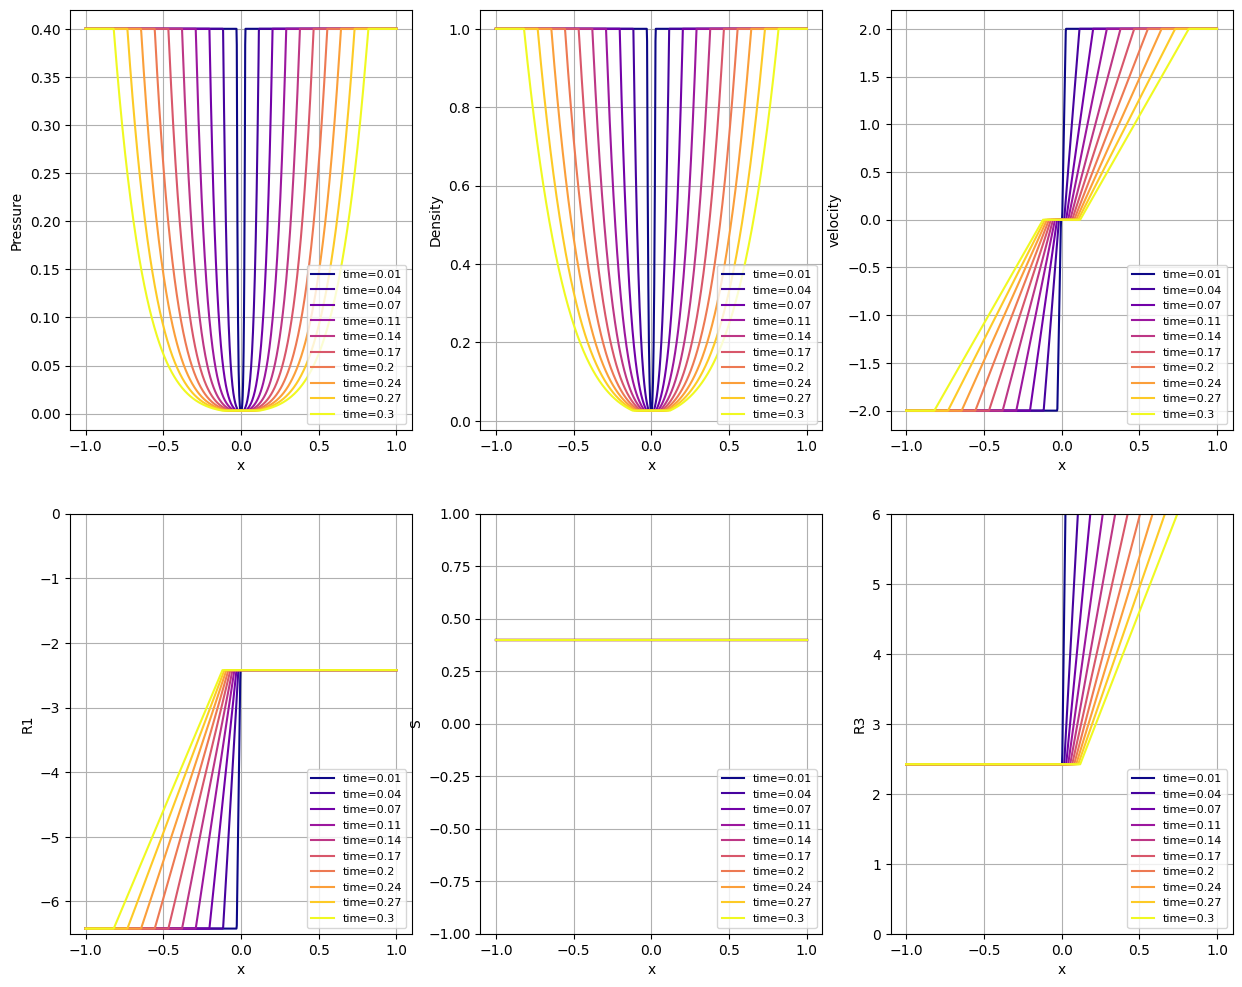

solution found! P_star= 0.0018938734200541862 took 8 iterations
0.0018938734200547632
0.0
0.02185211820681283 0.02185211820681283
-2.748331477354788 -0.3483314773547883 2.748331477354788 0.3483314773547883
c= 0.3483314773547883 0.3483314773547883
0.4


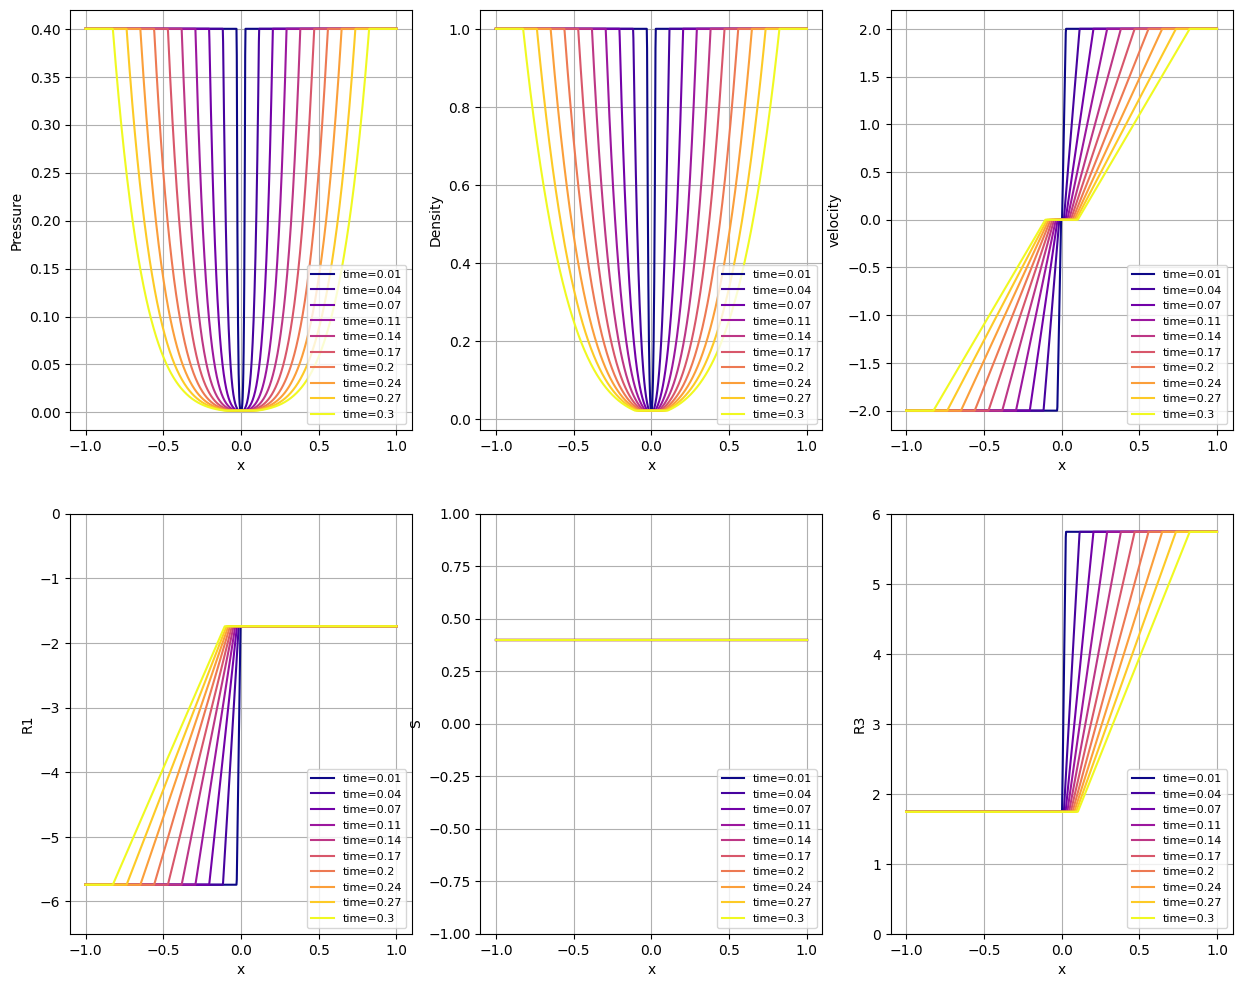

solution found! P_star= 9.429978991176604e-05 took 7 iterations
9.429978991176604e-05
0.0
0.006527236636200212 0.006527236636200212
-2.8148619514985347 -0.15486195149853466 2.8148619514985347 0.15486195149853466
c= 0.15486195149853466 0.15486195149853466
0.4


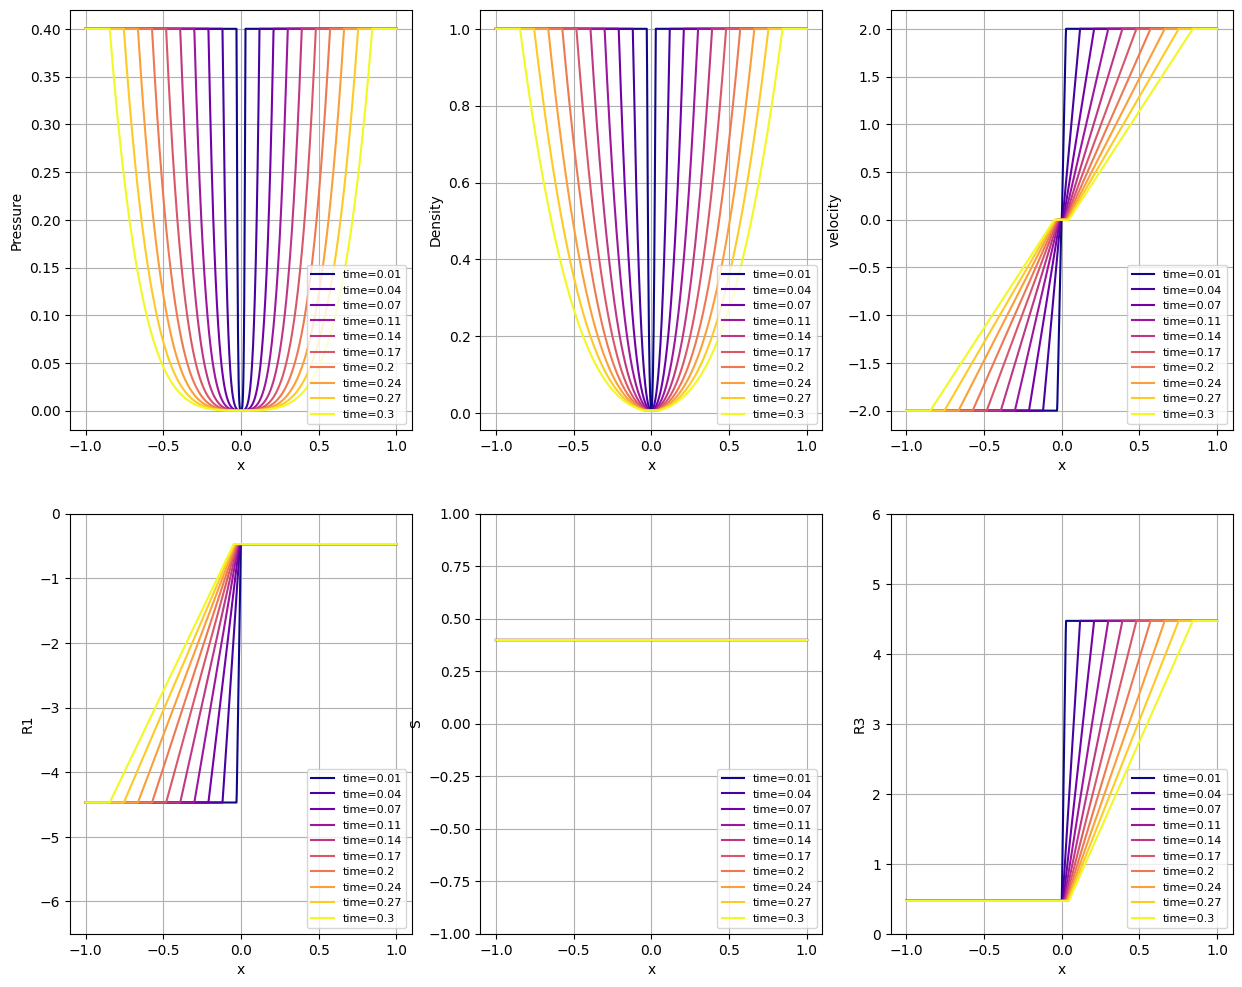

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import fsolve
#Domain
xmin= -1
xmax= 1
x= np.linspace(xmin,xmax,1000)
x_int= 0
#gamma values
gam= 1.33,1.4,1.66
#time steps
t0 =0.01 
t_max= 0.3
dt= 0.001
time= np.linspace(t0,t_max,10)
# initial density, velocity and pressure in the left and right sides
rho_L,rho_R= 1,1
v_L,v_R= -2,2
p_L,p_R= 0.4,0.4

for gamma in gam:
    # sound speed
    c_L= np.sqrt(gamma*(p_L/rho_L))
    c_R= np.sqrt(gamma*(p_R/rho_R))
    g1=(gamma-1)/(2*gamma)
    #rarefraction condition
    def f_rar(p_star,p,c):
        return (2*c/ (gamma-1)) * ((p_star/p)**g1 - 1)
   
    def f_star(p_star):
       return f_rar(p_star,p_L,c_L) + f_rar(p_star, p_R,c_R) + v_R - v_L
    def df_star(p_star):
         df_L= (1/(rho_L*c_L))* (p_star/p_L)**(-(gamma+1)/(2*gamma))
         df_R=(1/(rho_R*c_R))* (p_star/p_R)**(-(gamma+1)/(2*gamma))
         return df_L + df_R  
    #Newton-Raphson Scheme
    def newt_raph(p_in,iterations):
      for i in range(iterations):
          p_star= p_in - (f_star(p_in)/df_star(p_in))
          #print(f_star(p_in),df_star(p_in))
          #print(p_star)
          CHA=  abs(p_star - p_in)/(0.5*(p_star + p_in))
          p_in=p_star
          if 0< CHA < 1e-6:
              print('solution found! P_star=', p_star,'took',i+1,'iterations')
              break
    #initial p_init value
    # = tolerance (as mentioned max(Tol,p_pv) in the reference book
    #p_init= (p_L+p_R)**0.5 (gives negative value for pressure and hence Nan values)
    p_init= 1e-6
    newt_raph(p_init,10)
    
    t1= c_L/(p_L)**g1
    t2=c_R/p_R**g1
    p2r=((c_L+c_R -(0.5*(gamma-1)*(v_R-v_L)))/(t1+t2))**(1/g1) #exact solution for p_star
    p_star=p2r
    print(p2r)    
    v_star= 0.5*(v_L +v_R - f_rar(p2r,p_L,c_L) + f_rar(p2r,p_R,c_R))
    print(v_star)
    rho_star_L = (p_L/p2r)**(-1/gamma) * rho_L
    rho_star_R = (p_R/p2r)**(-1/gamma) * rho_R
    print(rho_star_L, rho_star_R)
    c_star_L,c_star_R= c_L*(p_star/p_L)**g1, c_R*(p_star/p_R)**g1
    params=['Pressure', 'Density','velocity', 'R1','S','R3']
    #solution 
    #head and tail velocities
    S_head_L= v_L - c_L
    S_tail_L= v_star - c_star_L
    S_head_R = v_R + c_R
    S_tail_R = v_star + c_star_R
    print(S_head_L, S_tail_L, S_head_R, S_tail_R)
    print('c=',c_star_L,c_star_R)
    fig, ax = plt.subplots(2, 3, figsize=(15,12))
    ax=ax.flatten()
    k=0
    #iterations
    for t in time:
        i=-1
        #Use of globals to store the values at each time step in a different array
        globals()['p_'+str(t)]= np.zeros(len(x))
        globals()['rho_'+str(t)]=np.zeros(len(x))
        globals()['v_'+str(t)]=np.zeros(len(x))
        globals()['R1_'+str(t)]= np.zeros(len(x))
        globals()['S_'+str(t)]=np.zeros(len(x))
        globals()['R3_'+str(t)]=np.zeros(len(x))
        for x0 in x:
           i=i+1
           #left side
           if x0<= x_int:
                if x0/t <= S_head_L:
                     globals()['p_'+str(t)][i]= p_L
                     globals()['rho_'+str(t)][i]= rho_L
                     globals()['v_'+str(t)][i]= v_L
                     globals()['R1_'+str(t)][i]= v_L-(2*c_L/(gamma-1))
                     globals()['S_'+str(t)][i]= p_L/(rho_L**gamma)
                     globals()['R3_'+str(t)][i]= v_L+(2*c_L/(gamma-1))
                elif S_head_L < x0/t <=S_tail_L:
                    globals()['p_'+str(t)][i]= p_L*((2/(gamma+1)) + ((gamma-1)/(c_L*(gamma+1)))*(v_L- (x0/t)))**(1/g1)
                    globals()['rho_'+str(t)][i]= rho_L*((2/(gamma+1)) + ((gamma-1)/(c_L*(gamma+1)))*(v_L- (x0/t)))**(1/(gamma*g1))
                    globals()['v_'+str(t)][i]= (2/(gamma+1))*(c_L + 0.5*(gamma-1)*v_L + x0/t)
                    v_fan_L= globals()['v_'+str(t)][i]
                    c_fan_L= np.sqrt(gamma*(globals()['p_'+str(t)][i]/globals()['rho_'+str(t)][i]))
                    globals()['R1_'+str(t)][i]= v_fan_L-(2*c_fan_L/(gamma-1))
                    globals()['S_'+str(t)][i]= globals()['p_'+str(t)][i]/(globals()['rho_'+str(t)][i]**gamma)
                    globals()['R3_'+str(t)][i]= v_fan_L+(2*c_fan_L/(gamma-1))
                elif S_tail_L< x0/t <= v_star:
                     globals()['p_'+str(t)][i]= p_star
                     globals()['rho_'+str(t)][i]= rho_star_L
                     globals()['v_'+str(t)][i]= v_star
                     globals()['R1_'+str(t)][i]= v_star-(2*c_star_L/(gamma-1))
                     globals()['S_'+str(t)][i]= globals()['p_'+str(t)][i]/(globals()['rho_'+str(t)][i]**gamma)
                     globals()['R3_'+str(t)][i]= v_star+(2*c_star_L/(gamma-1))
           #right side
           else: 
                
                if v_star< x0/t <= S_tail_R:
                     globals()['p_'+str(t)][i]= p_star
                     globals()['rho_'+str(t)][i]= rho_star_R
                     globals()['v_'+str(t)][i]= v_star
                     globals()['R1_'+str(t)][i]= v_star-(2*c_star_R/(gamma-1))
                     globals()['S_'+str(t)][i]= p_star/(rho_star_R**gamma)
                     globals()['R3_'+str(t)][i]= v_star+(2*c_star_R/(gamma-1))
                elif S_tail_R < x0/t <= S_head_R:
                    globals()['p_'+str(t)][i]= p_R*((2/(gamma+1)) - ((gamma-1)/(c_R*(gamma+1)))* (v_R- (x0/t)))**(1/g1)
                    globals()['rho_'+str(t)][i]= rho_R*((2/(gamma+1)) - ((gamma-1)/(c_L*(gamma+1)))* (v_R- (x0/t)))**(1/(gamma*g1))
                    globals()['v_'+str(t)][i]= (2/(gamma+1))*(- c_R + 0.5*(gamma-1)*v_R + x0/t)
                    v_fan_R= globals()['v_'+str(t)][i]
                    c_fan_R= np.sqrt(gamma*(globals()['p_'+str(t)][i]/globals()['rho_'+str(t)][i]))
                    globals()['R1_'+str(t)][i]= v_fan_R-(2*c_fan_R/(gamma-1))
                    globals()['S_'+str(t)][i]= globals()['p_'+str(t)][i]/(globals()['rho_'+str(t)][i]**gamma)
                    globals()['R3_'+str(t)][i]= v_fan_R+(2*c_fan_R/(gamma-1))
                elif  S_head_R < x0/t:
                    globals()['p_'+str(t)][i]= p_R
                    globals()['rho_'+str(t)][i]=rho_R
                    globals()['v_'+str(t)][i]= v_R
                    globals()['R1_'+str(t)][i]= v_R-(2*c_R/(gamma-1))
                    globals()['S_'+str(t)][i]= globals()['p_'+str(t)][i]/(globals()['rho_'+str(t)][i]**gamma)
                    globals()['R3_'+str(t)][i]= v_R+(2*c_R/(gamma-1))

        #plotting results
        col=np.linspace(0,1,10)
        cmap = plt.colormaps.get_cmap('plasma')
        ax[0].plot(x, globals()['p_'+str(t)],label='time='+str(round(t,2)),color=cmap(col[k]))
        ax[1].plot(x, globals()['rho_'+str(t)],label='time='+str(round(t,2)),color=cmap(col[k]))
        ax[2].plot(x, globals()['v_'+str(t)],label='time='+str(round(t,2)),color=cmap(col[k]))
        ax[3].plot(x, globals()['R1_'+str(t)],label='time='+str(round(t,2)),color=cmap(col[k]))
        ax[4].plot(x, globals()['S_'+str(t)],label='time='+str(round(t,2)),color=cmap(col[k]))
        ax[5].plot(x, globals()['R3_'+str(t)],label='time='+str(round(t,2)),color=cmap(col[k]))
        k=k+1
        
    for i in range(6):
            ax[i].grid()
            ax[i].set_xlabel('x')
            ax[i].set_ylabel(params[i])
            ax[i].legend(loc='lower right',fontsize=8)
    ax[3].set_ylim(-6.5,0)
    ax[4].set_ylim(-1,1)
    ax[5].set_ylim(0,6)
    print(globals()['S_'+str(t)][0])
    plt.savefig(str(gamma)+'.png')
    plt.show()